<a href="https://colab.research.google.com/github/BVamshikrishna/Resume-Screening-using-NLP-with-Python/blob/main/Resume_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
rdf = pd.read_csv('/content/drive/MyDrive/Ml Projects/UpdatedResumeDataSet.csv')
rdf['cleaned_resume'] = ''
rdf.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [3]:
print("Distinct categories of Resumes")
rdf['Category'].unique()

Distinct categories of Resumes


array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [4]:
print('no of records belonging to each category')
rdf['Category'].value_counts()

no of records belonging to each category


Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
ETL Developer                40
Blockchain                   40
Sales                        40
Data Science                 40
Mechanical Engineer          40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [5]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    object
 1   Resume          962 non-null    object
 2   cleaned_resume  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


Visualizing the Catogeries in the dataset

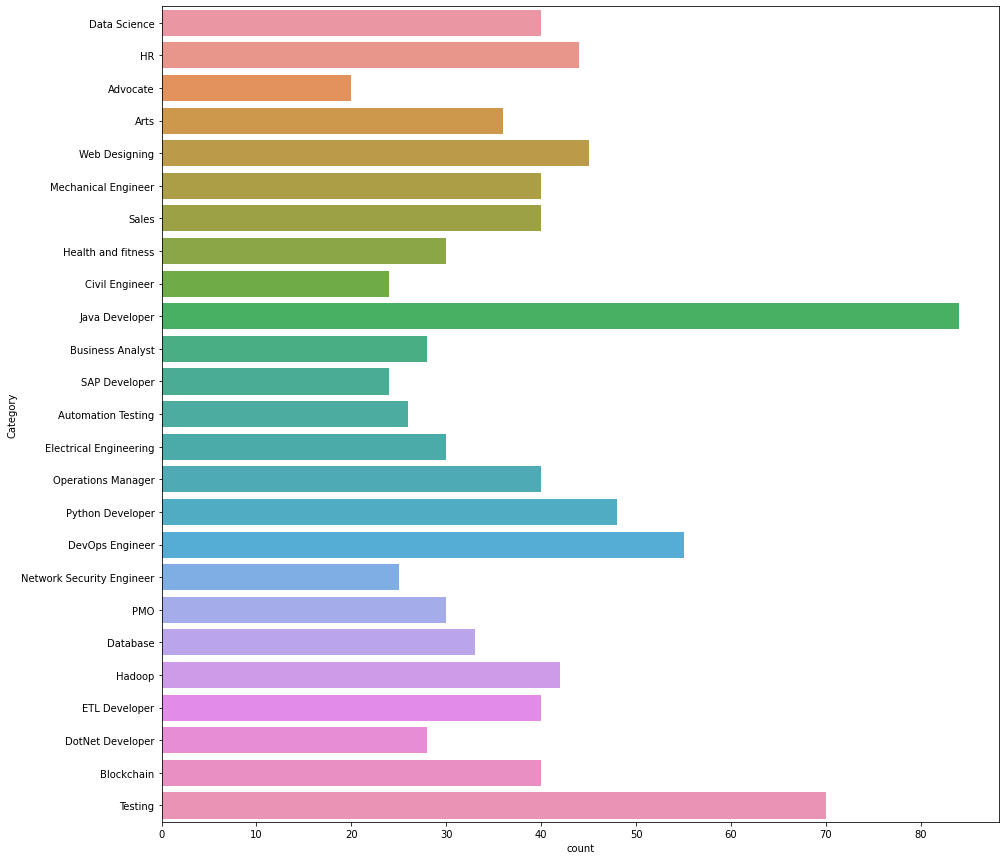

In [6]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.countplot(y='Category', data=rdf)

Visualizing Distribution of Category

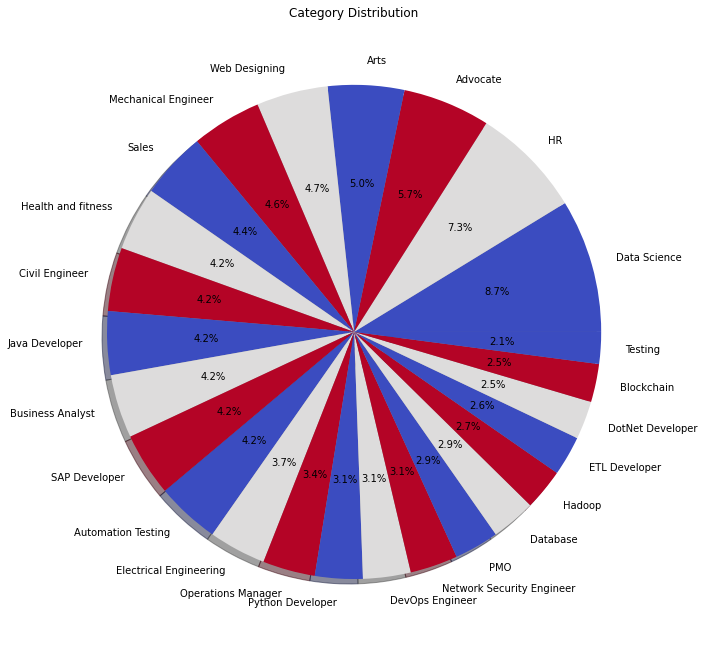

In [7]:
from matplotlib.gridspec import GridSpec
target_counts = rdf['Category'].value_counts()
target_labels = rdf['Category'].unique()

# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2,2)

cmap = plt.get_cmap('coolwarm')
colors = (cmap(i) for i in np.linspace(0,1,3))
plt.subplot(the_grid[0,1], aspect=1, title = "Category Distribution")
source_pie = plt.pie(target_counts, labels=target_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

Create a helper function to remove  URL's, hashtags, metions, Special letters and Punctuations

In [8]:
import re
def cleanResume(resumeText):
  resumeText = re.sub('http\S+\s*',' ', resumeText) #remove URLs
  resumeText = re.sub('RT|cc',' ',resumeText) #remove RT,CC
  resumeText = re.sub('#\S+ ',' ', resumeText) #remove hashtags
  resumeText = re.sub('@\S+','', resumeText) #remove mentions
  resumeText = re.sub('[%s]' %re.escape("""~!@#$%^&*()_-+={[]}|\:;"',./<>?"""), ' ', resumeText)# remove Punctuations
  resumeText = re.sub(r'[^\x00-^\x7f]',r'', resumeText)
  resumeText = re.sub('\s+','', resumeText) # remove eextra whitespaces
  return resumeText

rdf['cleaned_resume'] = rdf.Resume.apply(lambda x: cleanResume(x))

In [9]:
rdf['cleaned_resume']

0      SPLPSJJSJQMRSVMNBKNNRFDTBCAWESANLDTMLDANMFPCAN...
1      EDM2013M2017BEUITRGPVDSDSMSDPEL1SE12AWSEL1MEL1...
2      AIDLCSDPPEMWDATAHALBF4MSSEM2000TSPMPJLVPWFWDFL...
3      SRPSAPHANATSAPHANASQLSAPHANAPALMSSQLSAPLCLPDMA...
4      EDMCAYMCAUSTFHDSSDDSEL1CEL1DAEL1PEL1CJEL1DMEL1CDI
                             ...                        
957    CSPMSWBEPSHLCSRIGIEDBEEEENMGGSCERCDEENMSMESPCT...
958    WPGTPDECLARATIONIIDNDMMSEDJ2015ETEKMSUJ2012ESH...
959    PERSONALSKILLSQECGAPERSONALDOSSIERFNDWEDJ2012J...
960    COMPUTERSKILLSSOFTWAREKNOWLEDGEMSPPMSOCPPCBDMM...
961    SSOSWXP788110DMYSQL200520082012LCJWTHTMLCSSTMT...
Name: cleaned_resume, Length: 962, dtype: object

Wordcloud represents the most numbers of words larger and vice versa:

In [10]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[('EDJ2012M2015BAECTNSHSDCDAITSH', 8), ('TSWTAJSHTML5CSS3SASSBJJSBVSPVSCEDJ2015BECSENMGHRCEO2009PCCNMMSBCMOCEANWDWDTSSSDPHOTOSHOPE28BOOTSTRAPE6HTML5E6JAVASCRIPTE6CSS3EL1A4EL1CDTSSP1TBCBSPDTBCBSTSRRRUISUI50AM2LBLAPDLBMVCTCBSRRDUIM3CSBAPDCSBAMVCRRDUIM4SGSTPDSGSTWBAASPGSTRGSTR2ARRDUID5TAPDTARRDSUI6WPN1TSRTS2VMUCOB3GISSS4SUSARRCMDPN1JB2AEFRRCMD10MFNM', 8), ('GQKEDMBAMIBMPMPUBTTNMMNUGMACSGMACSSDCDSCE3072105CVJCP1010GMACS6SS66CPGMIA766DD8SSSCP2020TOTAL350WORKINGEXPERIENCEINCORPORATESNTCNTH1PTEAP1D8WLRP2NKAPL216CCP3BCFHLP321SP4TVSPPL216JP75EARCW168DNP8TOTAL229ADJOININGSKILLSWWMSOCEHMO', 6), ('OSWXPV07EDJ2018MFANMNUJ2016BFAPNMNUJ2012DAMSBJ2010HSCMSBJ2008SSCMSBFSDMCE96CDSFACILSFACIN2018IAATDBFAMFAITIHPDO', 6), ('AA2000WDCEDJ2000J2001BASMMTMUJ1998J2000BASSCJ1997J1998HSC

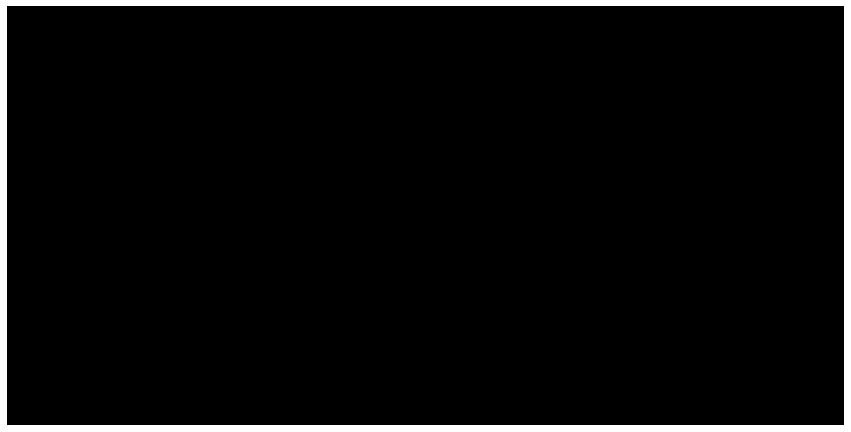

In [11]:
nltk.download('stopwords')
nltk.download('punkt')
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords = []
Sentences = rdf['Resume'].values
cleanedSentences = ""
for i in range(0,160):
  cleanedText = cleanResume(Sentences[i])
  cleanedSentences += cleanedText
  requiredWords = nltk.word_tokenize(cleanedText)
  for word in requiredWords:
    if word not in oneSetOfStopWords and word not in string.punctuation:
      totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostCommon = wordfreqdist.most_common(50) 
print(mostCommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
# convert the words into categorical values
from sklearn.preprocessing import LabelEncoder
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
  rdf[i] = le.fit_transform(rdf[i])

Training ML model to Resume Screening

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = rdf['cleaned_resume'].values
requiredTarget = rdf['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 166)
(193, 166)


In [14]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.94

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                    n_jobs=None):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      0.83      0.91         6
           5       1.00      1.00      1.00         5
         